In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
%matplotlib notebook

conv2 = lambda x,k: convolve2d(x, k, mode='same', boundary='wrap')

<IPython.core.display.Javascript object>


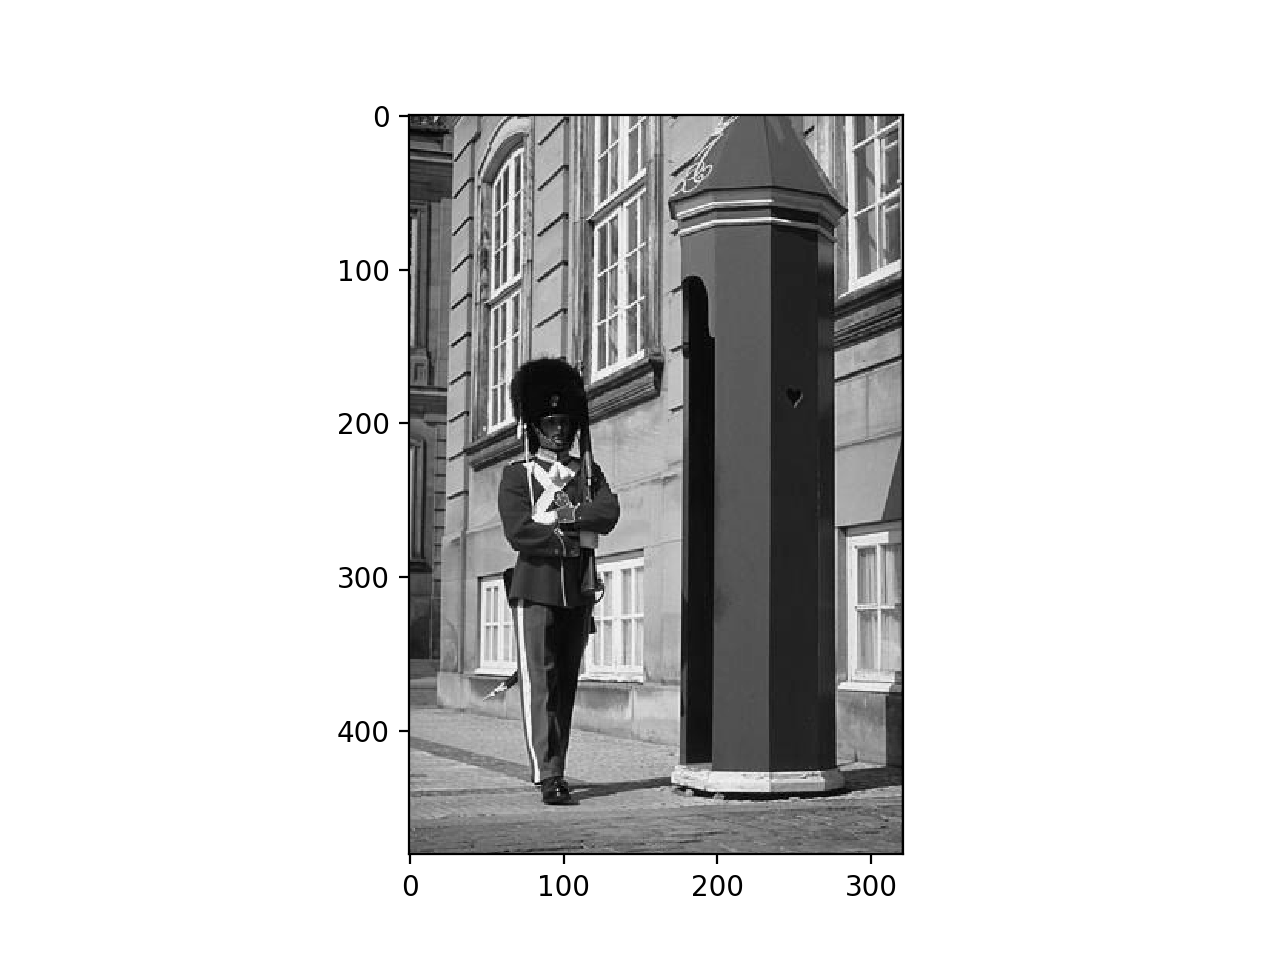

In [2]:
# Load an image
img = np.float32(imread('example.jpg'))/255.
plt.imshow(img, cmap='gray')

<IPython.core.display.Javascript object>


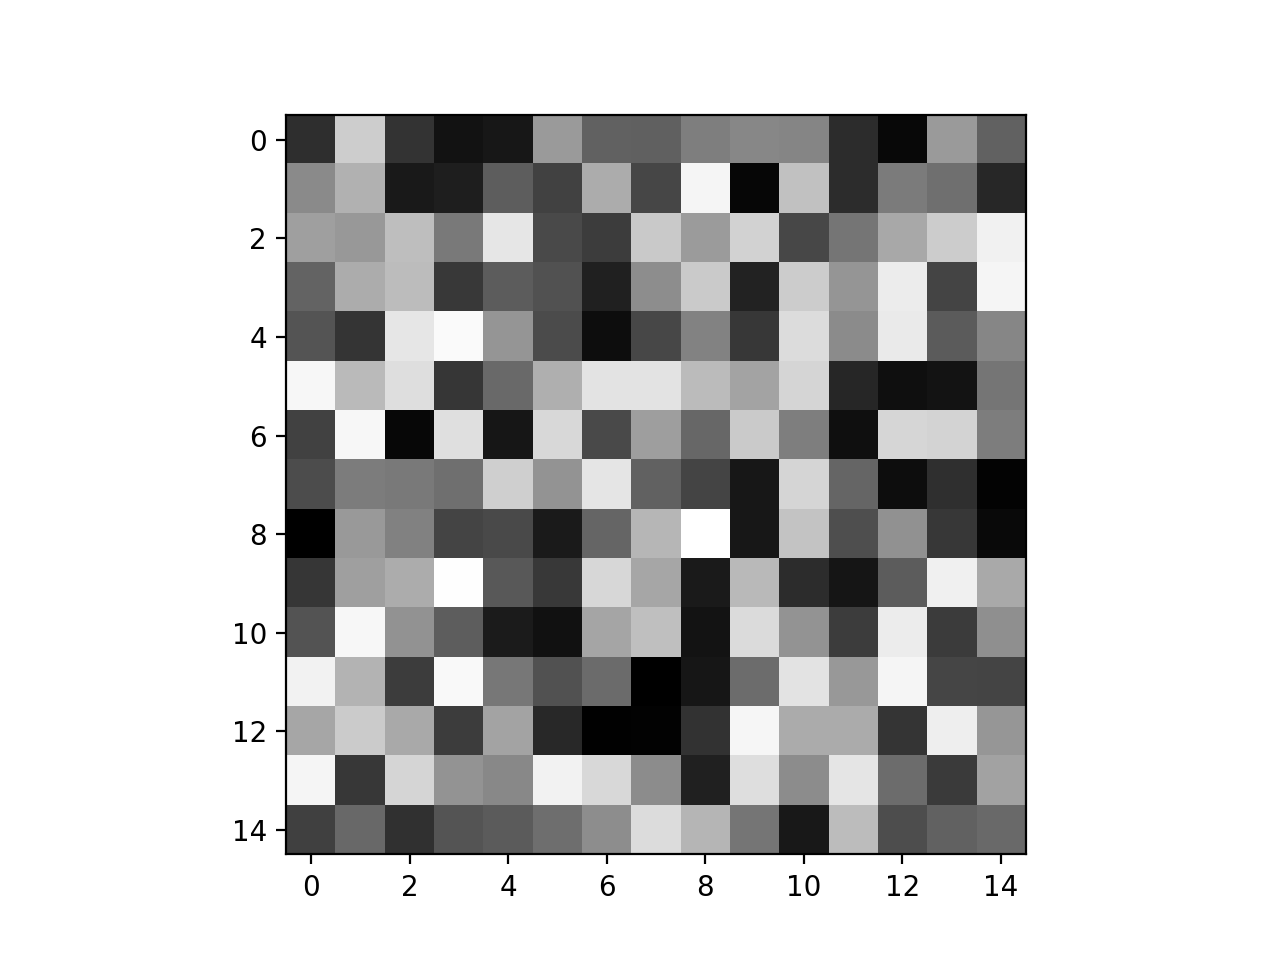

In [4]:
# Define a blur kernel
# k = np.float32(imread('blur_kernel.png', as_gray=True))
k = np.random.random([15,15])
k = k / np.sum(k)
plt.imshow(k, cmap='gray')

<IPython.core.display.Javascript object>


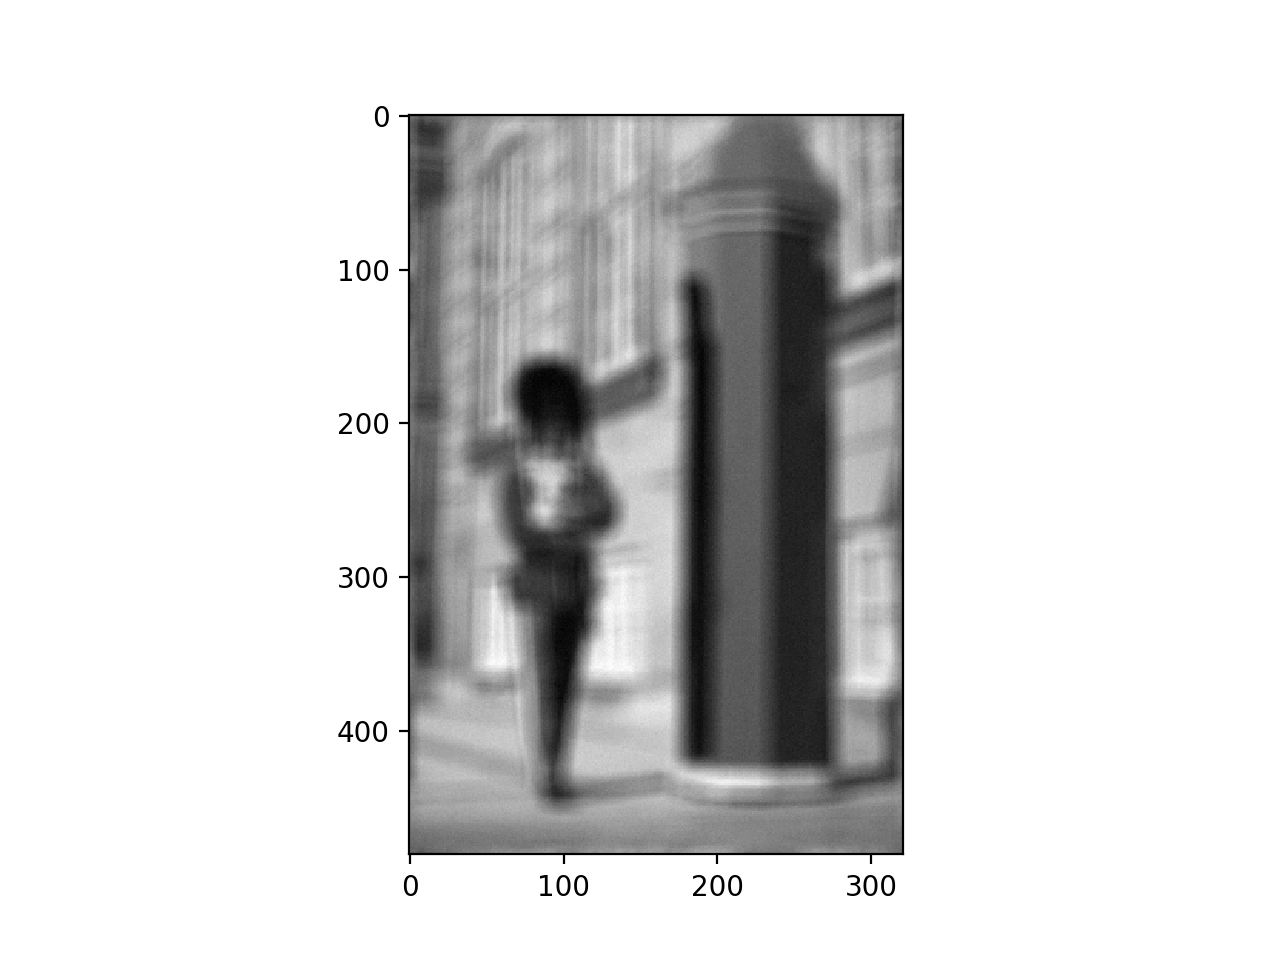

In [5]:
# Blur the image and add noise
blur = conv2(img, k) + np.random.normal(scale=0.01, size=img.shape)
plt.imshow(blur, cmap='gray')

In [6]:
# Derivative kernel
kx = np.array([[1.,0,-1.],[2.,0,-2.],[1.,0,-1.]])
ky = np.array([[1.,2.,1.],[0,0,0],[-1.,-2.,-1.]])

# Gaussian derivative
gx = gaussian_filter(kx, sigma=1, mode='wrap')
gy = gaussian_filter(ky, sigma=1, mode='wrap')

# Flipped kernels
k_f = k[::-1,::-1].copy()
gx_f = gx[::-1,::-1].copy()
gy_f = gy[::-1,::-1].copy()

In [7]:
# Deblur with conjugate gradient method

# Params
niter = 100
lmd = 0.1

# k = 0
X = np.zeros(img.shape)
QX = conv2(conv2(X,k), k_f) + lmd * conv2(conv2(X,gx), gx_f) + lmd * conv2(conv2(X,gy), gy_f)
b = conv2(blur, k_f)
r = b - QX
p = r.copy()

# Iteratively
for i in range(niter):
    Qp = conv2(conv2(p,k), k_f) + lmd * conv2(conv2(p,gx), gx_f) + lmd * conv2(conv2(p,gy), gy_f)
    alpha = np.sum(r**2) / np.sum(p*Qp)
    X = X + alpha*p
    r_next = r - alpha*Qp
    beta = np.sum(r_next**2) / np.sum(r**2)
    p = r_next + beta*p
    r = r_next

<IPython.core.display.Javascript object>


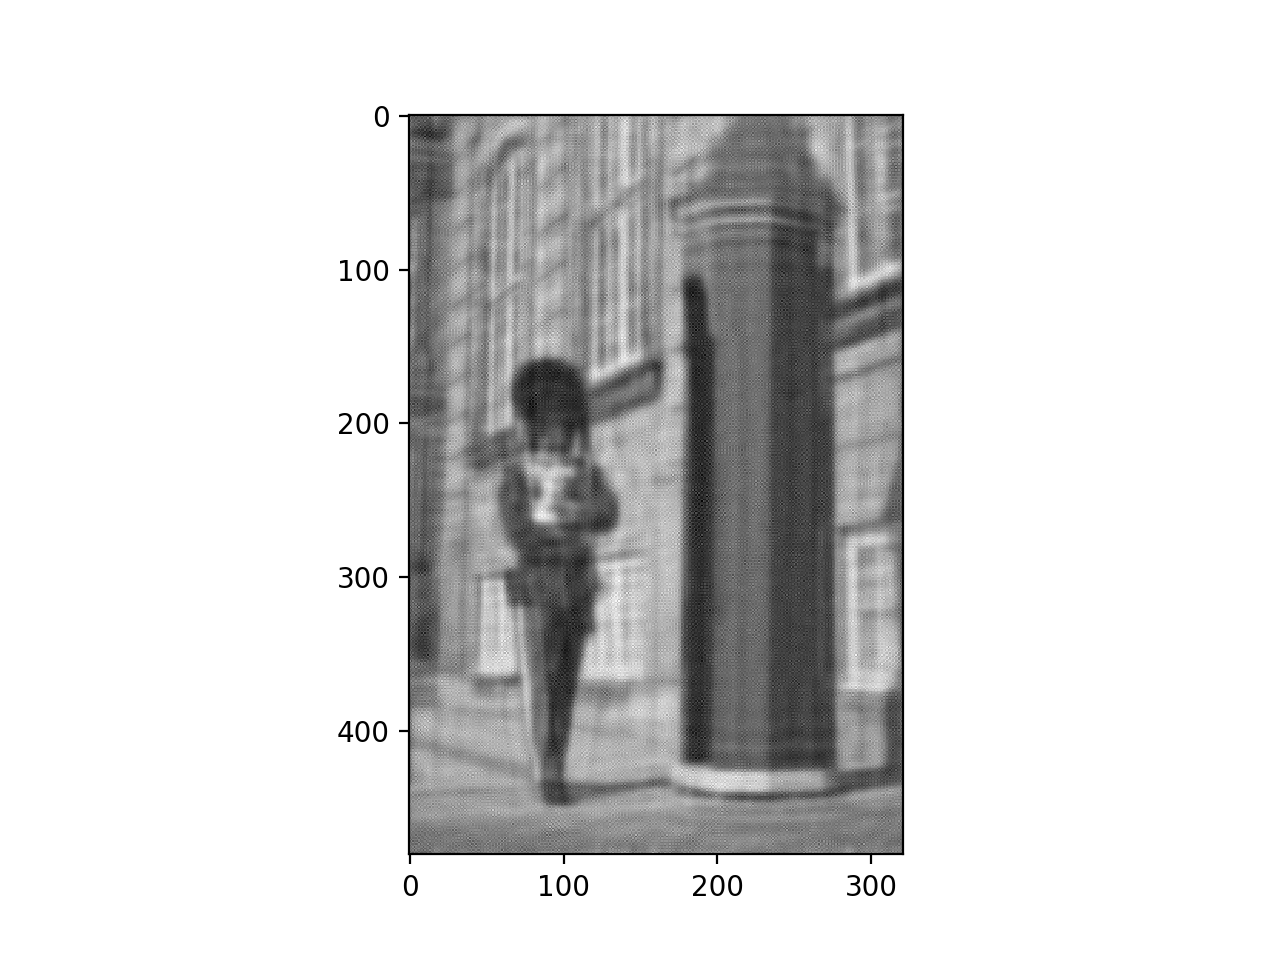

In [8]:
plt.imshow(X, cmap='gray')